# CAO Points

## Introduction

The CAO points data, available from the [CAO website](http://www.cao.ie), is published in a different format for each of the years 2019, 2020, and 2021. Each year's data, therefore, requires a different approach to acquisition, conversion to pandas dataframe, and cleaning. The 2019 data is published in two pdf files; one for level 8 courses, and one for levels 6 and 7. The 2020 data is published as an Excel spreadsheet, and the 2021 data as preformatted text in a HTML webpage.

The relevant columns are `Course Code`, `Course Name`, `Institution Name`, `EOS`, which is the number of points achieved by the last applicant to be offered a place on the course, and `Mid`, which is the mid point between the number of points held by the highest point score and the lowest point score of the applicants offered a place on the course [1].

## Acquiring the data

In [25]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from tabula import read_pdf
import requests
from requests.compat import urljoin


In [26]:
base_url = 'http://www2.cao.ie/points/'

# 2019 data is provided in PDF format
cao_2019_urls  = ('lvl8_19.pdf', 'lvl76_19.pdf')

# for each of the two points pdfs construct url, 
# fetch pdf, and write to working directory
for url in (cao_2019_urls):
    response = requests.get(urljoin(base_url, url))
    with open(url, 'wb') as f:
        f.write(response.content)

In [27]:
# read the entire pdf, extracting tables into a single dataframe
df = read_pdf("lvl8_19.pdf", pages="all", multiple_tables=False)[0]
df.head(10)

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,NaN,Athlone Institute of Technology,NaN,NaN
1,AL801,Software Design with Virtual Reality and Gaming,304,328
2,AL802,Software Design with Cloud Computing,301,306
3,AL803,Software Design with Mobile Apps and Connected...,309,337
4,AL805,Network Management and Cloud Infrastructure,329,442
5,AL810,Quantity Surveying,307,349
6,AL820,Mechanical and Polymer Engineering,300,358
7,AL830,General Nursing,410,429
8,AL832,Psychiatric Nursing,387,403
9,AL836,Nutrition and Health Science,352,383


In [28]:
# Create a new column in the dataframe for institution name 
# identify institution name rows as those containing null course codes
# and add those institution names to the new institution column
df['Institution'] = df[df['Course Code'].isnull()]['INSTITUTION and COURSE']
df.rename(columns={'INSTITUTION and COURSE':'Course Name'}, inplace=True)
df.head()

,Course Code,Course Name,EOS,Mid,Institution
0,NaN,Athlone Institute of Technology,NaN,NaN,Athlone Institute of Technology
1,AL801,Software Design with Virtual Reality and Gaming,304,328,NaN
2,AL802,Software Design with Cloud Computing,301,306,NaN
3,AL803,Software Design with Mobile Apps and Connected...,309,337,NaN
4,AL805,Network Management and Cloud Infrastructure,329,442,NaN


In [29]:
# Fill empty fields in the institution column with the most recent non-na field
df['Institution'] = df['Institution'].fillna(method='ffill')
df.head()

,Course Code,Course Name,EOS,Mid,Institution
0,NaN,Athlone Institute of Technology,NaN,NaN,Athlone Institute of Technology
1,AL801,Software Design with Virtual Reality and Gaming,304,328,Athlone Institute of Technology
2,AL802,Software Design with Cloud Computing,301,306,Athlone Institute of Technology
3,AL803,Software Design with Mobile Apps and Connected...,309,337,Athlone Institute of Technology
4,AL805,Network Management and Cloud Infrastructure,329,442,Athlone Institute of Technology


In [30]:
# Finally, remove rows containing only institution names
df = df[df['Course Code'].notna()]

# Set some display options
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_colwidth", None)

df

,Course Code,Course Name,EOS,Mid,Institution
1,AL801,Software Design with Virtual Reality and Gaming,304,328,Athlone Institute of Technology
2,AL802,Software Design with Cloud Computing,301,306,Athlone Institute of Technology
3,AL803,Software Design with Mobile Apps and Connected...,309,337,Athlone Institute of Technology
4,AL805,Network Management and Cloud Infrastructure,329,442,Athlone Institute of Technology
5,AL810,Quantity Surveying,307,349,Athlone Institute of Technology
...,...,...,...,...,...
960,WD200,Arts (options),221,296,Waterford Institute of Technology
961,WD210,Software Systems Development,271,329,Waterford Institute of Technology
962,WD211,Creative Computing,275,322,Waterford Institute of Technology
963,WD212,Recreation and Sport Management,274,311,Waterford Institute of Technology


In [31]:
# Examine EOS values which contain non-numeric characters
df[df['EOS'].str.contains(r'[^0-9#*]') == True]

,Course Code,Course Name,EOS,Mid,Institution
431,AD101,First Year Art & Design (Common Entry),# +mat,ic 550,National College of Art and Design
432,AD102,Graphic Design and Moving Image Design,# +mat,ic 635,National College of Art and Design
433,AD103,Textile & Surface Design and Jewellery & Objects,# +mat,ic 545,National College of Art and Design
434,AD202,Education & Design or Fine Art (Second Level T...,# +mat,ic 580,National College of Art and Design
435,AD204,Fine Art,# +mat,ic 600,National College of Art and Design
436,AD211,Fashion Design,# +mat,ic 600,National College of Art and Design
437,AD212,Product Design,# +mat,ic 600,National College of Art and Design
439,AD217,Illustration,# +mat,ic 625,National College of Art and Design
440,AD222,Interaction Design,# +mat,ic 657,National College of Art and Design
815,LM124,Mathematics (Math Science/Maths and Physics/Ec...,e)427,521,University of Limerick


In [32]:
# Examine Mid values which contain non-numeric characters
df[df['Mid'].str.contains(r'[^0-9]') == True]

,Course Code,Course Name,EOS,Mid,Institution
431,AD101,First Year Art & Design (Common Entry),# +mat,ic 550,National College of Art and Design
432,AD102,Graphic Design and Moving Image Design,# +mat,ic 635,National College of Art and Design
433,AD103,Textile & Surface Design and Jewellery & Objects,# +mat,ic 545,National College of Art and Design
434,AD202,Education & Design or Fine Art (Second Level T...,# +mat,ic 580,National College of Art and Design
435,AD204,Fine Art,# +mat,ic 600,National College of Art and Design
436,AD211,Fashion Design,# +mat,ic 600,National College of Art and Design
437,AD212,Product Design,# +mat,ic 600,National College of Art and Design
439,AD217,Illustration,# +mat,ic 625,National College of Art and Design
440,AD222,Interaction Design,# +mat,ic 657,National College of Art and Design


In [33]:
# Create new column indicating whether the course requires a test, interview or portfolio
# This is indicated by a '#' in the EOS column
df['Test'] = df['EOS'].str.contains('#', na=False)

# Create a column indicating courses where not all applicants at EOS point score were offered a place
# This is indicated by a '*' in the EOS column
df['Not All'] = df['EOS'].str.contains('\*', na=False)

# Create a column indicating courses where a matric is required
# This is indicated by the string '+matric' in the EOS column.
# However, the tabula table parsing has interpreted the r in matric as a cell boundary so only 'mat' 
# remains in the EOS column and 'ic' appears in the Mid column. The 'ic' will be dealt with next 
df['Matric'] = df['EOS'].str.contains('mat', na=False)




In [34]:
# Remove Non-digits from EOS and Mid columns and convert columns to numeric values, with NaNs where values are missing (errors = 'coerce')
# (Because NaN is a float, the whole columns must be floats)
df['EOS'] = pd.to_numeric(df['EOS'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')
df['Mid'] = pd.to_numeric(df['Mid'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')

In [54]:
# Repair LM124 Course Name
name = df[df['Course Code']=='LM124']['Course Name']
name += 'ce)'
pd.set_option('display.max_colwidth', None)
name
#df[df['Course Code']=='LM124']['Course Name']

815    Mathematics (Math Science/Maths and Physics/Ec...
Name: Course Name, dtype: object

## Analysing the data

In [35]:
df.describe()

,EOS,Mid
count,906.000000,915.000000
mean,374.951435,426.414208
std,123.902697,133.142255
min,55.000000,57.000000
25%,290.000000,339.000000
50%,348.000000,397.000000
75%,440.000000,477.500000
max,979.000000,1073.000000


array([[<AxesSubplot:title={'center':'EOS'}>,
        <AxesSubplot:title={'center':'Mid'}>]], dtype=object)

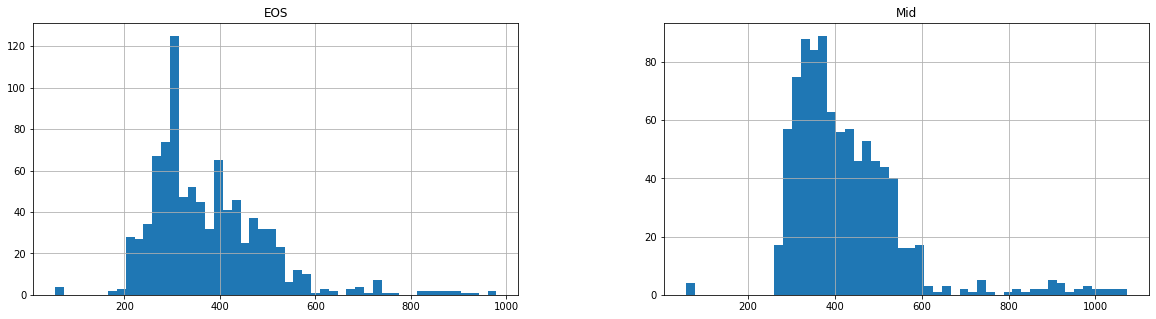

In [44]:
df[['EOS', 'Mid']].hist(bins=50, figsize=(20, 5))

## Conclusion

## References

[1] https://www.independent.ie/life/family/learning/understanding-your-cao-course-guide-26505318.html